# Homework 1 - Computational Physics 2

- Submission deadline: **Friday 27th January 2023 (by the end of the day).**


- When you finish the assignment, please send the **.ipynb file** via email to wbanda@yachaytech.edu.ec


- You may work on this homework individually or in pairs. Submitted assignments should have maximum 2 authors.


- You can call your notebook with your surname/s, e.g. hw1_names.ipynb, and also include your name/s in the notebook.


- Within a single python notebook, add the following:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from PIL import Image
import random
import sympy as sp


## Problem 1 (10 points): Quantum Harmonic Oscillator

The Schrödinger equation for the quantum harmonic oscillator is:

$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+\frac{1}{2}m\omega^2x^2\psi=E\psi$$

It can be rewritten, in terms of a new variable, $\xi\equiv\sqrt{\frac{m\,\omega}{\hbar}}x$, as follows:

$$\frac{d^2\psi}{d\xi^2}=\left(\xi^2 -K\right)\psi$$

where $K\equiv\frac{2E}{\hbar\omega}$ is the energy in units of $\frac{1}{2}\hbar\omega$.

### (a) 
Find the **ground state energy** of the harmonic oscillator, to five significant digits, by using **the shooting method**. That is, solve the above equation numerically, varying $K$ until you get a wave function that goes to zero at large $\xi$. The appropriate boundary conditions for the ground state (and any even state) are $\psi(0) = 1$, $\psi'(0) = 0$.

First we are going to convert the second order ODE into a 1st order ODE

We are going to consider the following change of variables:

$$\psi'(\xi) = v(\xi)$$

which gives us

$$v'(\xi) = (\xi^{2} - K) \psi(\xi)$$

resulting in the following matrix (system of ODEs) 

$$\frac{dS(\xi)}{d\xi} = \left[\begin{array}{cc}
0 & 1 \\
\xi^{2} - K & 0
\end{array}\right]S(\xi)$$

where $S(\xi) = \left[\begin{array}{c} \psi(\xi) \\ v(\xi) \end{array}\right]$



In [2]:
psi = sp.symbols("psi", cls = sp.Function)
xi = sp.symbols("xi")
K = sp.symbols("K")
h = sp.symbols("hbar")
w = sp.symbols("\omega ")

In [3]:
# Define ODE

diffeq = sp.Eq(psi(xi).diff(xi,2), (xi**2-K)*psi(xi))

display(diffeq)

Eq(Derivative(psi(xi), (xi, 2)), (-K + xi**2)*psi(xi))

In [4]:
# Solve the ODE:

diffeq = sp.Eq(psi(xi).diff(xi,2), (xi**2-K)*psi(xi))

result = sp.dsolve(diffeq, psi(xi), ics = {psi(0):1, psi(xi).diff(xi).subs(xi, 0): 0})

display(result)

Eq(psi(xi), -K*xi**5*r(3)/20 + C2*(K**2*xi**4/24 - K*xi**2/2 + xi**4/12 + 1) + C1*xi*(xi**4/20 + 1) + O(xi**6))

In [5]:
# Slope function

func = lambda xi, s: np.dot(np.array([[0, 1], [xi**2 - k , 0]]), s)

In [6]:
# Spacing
h_1 = 0.1


# x_axis
xi_00 = 0.
xi_ff = 6.

xi_axis = np.arange(xi_00, xi_ff + h_1, h_1)

# Initial conditions

psi_00_even = 1.0  #function at 0

d_psi_00_even = 0.0 #derivative at 0

# Assumption for k

k = 0.95

sol_0 = solve_ivp(func, [xi_00, xi_ff], [psi_00_even, d_psi_00_even], method='RK45', t_eval = xi_axis) #first solution
   
#Criteria for convergence: We are going to find where the function changes its asymptotic behavior for + to  - //
    # or viciversa as function of k

if sol_0.y[0,-1]>0:
    
    sign_1 = +1
    
else:
    
    sign_1 = -1
        
criteria = False
    
while criteria == False and k<2:

    sol_0 = solve_ivp(func, [xi_00, xi_ff], [psi_00_even, d_psi_00_even], method='RK45', t_eval = xi_axis)

    if sol_0.y[0,-1]>0:
        
        sign_2 = +1
    
    else: 
        
        sign_2 = -1
            
    if sign_1*sign_2 == -1:
        
        print("The value for K at the ground state energy is = " + str(round(k, 5)))
        
        break 
        
    else:
        k = k + 10**(-5)
    

k_0 = round(k,5) # The K value for the ground state energy



The value for K at the ground state energy is = 0.99996


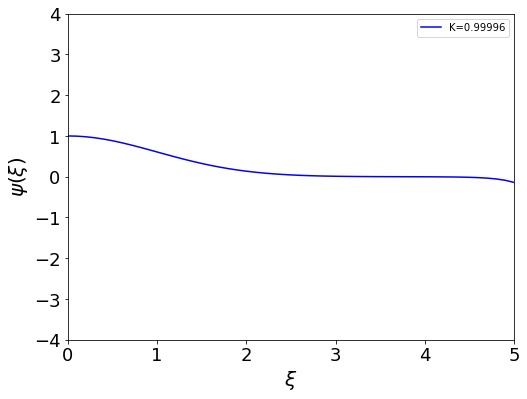

In [7]:
#The wavelength function looks as follow

# Plotting

plt.figure(figsize = (8,6))

plt.plot(sol_0.t, sol_0.y[0], "b", linestyle = '-', label ="K="+str(round(k,5)))

plt.xlabel(r'$\xi$', size= 20)
plt.ylabel(r'$\psi(\xi)$', size= 20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
        

plt.xlim(0,5)
plt.ylim(-4,4)

plt.legend()
plt.show()

plt.close()

Then, the ground state energy with five significant digits will be 

In [8]:
E0 = (k_0*h*w)/2

display(E0)

0.49998*\omega*hbar

### (b)  
Make a few illustrative panels showing plots of the wave function for different values of $K$ as it converges to the solution. What does the tail of the wave function does when the values are slightly above or below the correct solution?


Since the solution converges around 1 we can study the behaviour of diffent wave functions near 1

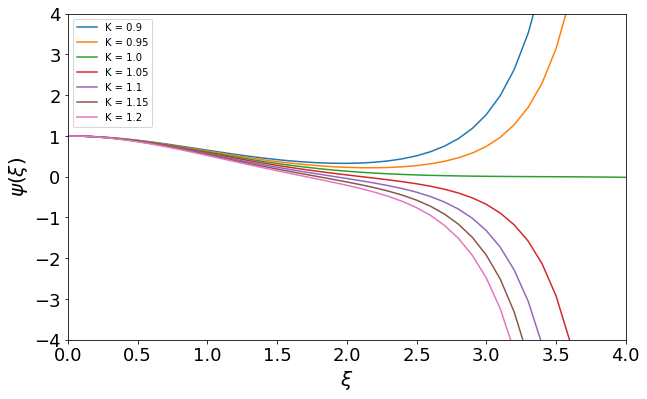

In [11]:
plt.figure(figsize=(10,6))

ks_0 = np.arange(0.9,1.1+0.1,0.05) #an array of different k's

for k in ks_0:
    
    sol = solve_ivp(func, [xi_00, xi_ff], [psi_00_even, d_psi_00_even], method='RK45', t_eval = xi_axis)
    
    plt.plot(sol.t, sol.y[0])


plt.xlim(0,4)
plt.ylim(-4,4)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
        

plt.xlabel(r'$\xi$', size= 20)
plt.ylabel(r'$\psi(\xi)$', size= 20)
    
plt.legend([f'K = {round(k, 3)}' for k in ks_0], loc=0)
plt.show()

We can notice that sligthly below value of K=1 the solution diverges to $+\infty $, and for above values the solution diverges to $-\infty $

### (c) 

Find the **first three excited state energies** (to five significant digits) for the harmonic oscillator, using **the shooting method**. For the first (and third) excited state you will need to set $\psi(0) = 0$, $\psi'(0) = 1$.)

In [14]:
# Initial conditions for the odd functions

psi_00_odd = 0.0  #function at 0

d_psi_00_odd = 1.0 #derivative at 0

# For the first exicted stated, we have

k = 2.95

sol_1 = solve_ivp(func, [xi_00, xi_ff], [psi_00_odd, d_psi_00_odd], method='RK45', t_eval = xi_axis)
    
if sol_1.y[0,-1] > 0:
    
    sign_1 = +1
    
else:
    
    sign_1 = -1
        
criteria = False
    
while criteria == False and k<4:

    sol_1 = solve_ivp(func, [xi_00, xi_ff], [psi_00_odd, d_psi_00_odd], method='RK45', t_eval = xi_axis)

    if sol_1.y[0,-1]>0:
        
        sign_2 = +1
        
    else: 
        
        sign_2 = -1
            
    if sign_1*sign_2 == -1:
        
        print("The value for k is = " + str(round(k, 5)))
        
        criteria == True  
        
        break
        
    else:
        
        k = k + 10**(-5)
    

k_1 = round(k,5)

The value for k is = 2.99939


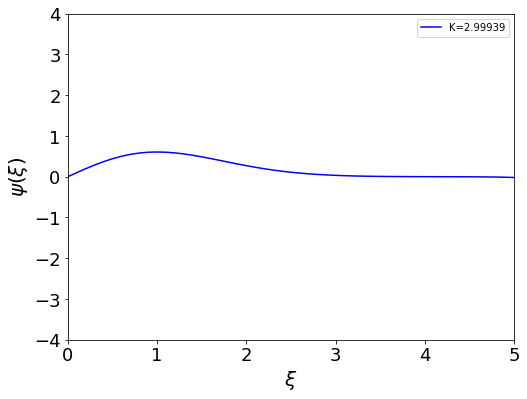

In [15]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(sol_1.t, sol_1.y[0], "b", linestyle = '-', label ="K="+str(round(k,5)))

plt.xlabel(r'$\xi$', size= 20)
plt.ylabel(r'$\psi(\xi)$', size= 20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
        

plt.xlim(0,5)
plt.ylim(-4,4)

plt.legend()
plt.show()

Then, the first state energy will be 

In [16]:
E1 = (k_1*h*w)/2

display(E1)

1.499695*\omega*hbar

In [25]:
# For the second excited stated, we have

psi_00_even = 1.0  #function at 0

d_psi_00_even = 0.0 #derivative at 0

k = 4.95

sol_2 = solve_ivp(func, [xi_00, xi_ff], [psi_00_even, d_psi_00_even], method='RK45', t_eval = xi_axis)
    
if sol_2.y[0,-1] > 0:
    
    sign_1 = +1
    
else:
    
    sign_1 = -1
        
criteria = False
    
while criteria == False and k<6:

    sol_2 = solve_ivp(func, [xi_00, xi_ff], [psi_00_even, d_psi_00_even], method='RK45', t_eval = xi_axis)

    if sol_2.y[0,-1]>0:
        
        sign_2 = +1
        
    else: 
        
        sign_2 = -1
            
    if sign_1*sign_2 == -1:
        
        print("The value for k is = " + str(round(k, 5)))
        
        criteria == True  
        
        break
        
    else:
        
        k = k + 10**(-5)
        
    

k_2 = round(k,5)




The value for k is = 4.99907


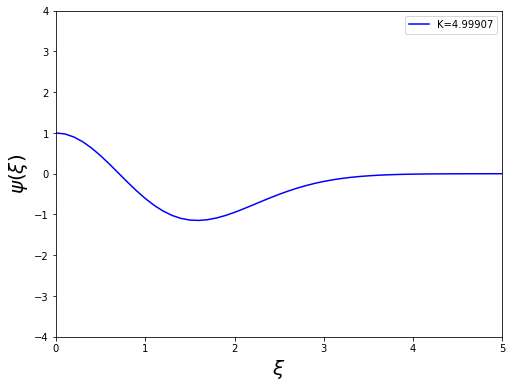

In [26]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(sol_2.t, sol_2.y[0], "b", linestyle = '-', label ="K="+str(round(k,5)))

plt.xlabel(r'$\xi$', size= 20)
plt.ylabel(r'$\psi(\xi)$', size= 20)

plt.xlim(0,5)
plt.ylim(-4,4)

plt.legend()
plt.show()

Then, the second state energy will be 

In [27]:
E2 = (k_2*h*w)/2

display(E2)

2.499535*\omega*hbar

In [28]:
# For the third exicted stated, we have

k = 6.95

sol_3 = solve_ivp(func, [xi_00, xi_ff], [psi_00_odd, d_psi_00_odd], method='RK45', t_eval = xi_axis)
    
if sol_3.y[0,-1] > 0:
    
    sign_1 = +1
    
else:
    
    sign_1 = -1
        
criteria = False
    
while criteria == False and k < 8:
#     print(k,sol.y[0,-1])
    sol_3 = solve_ivp(func, [xi_00, xi_ff], [psi_00_odd, d_psi_00_odd], method='RK45', t_eval = xi_axis)

    if sol_3.y[0,-1]>0:
        
        sign_2 = +1
        
    else: 
        
        sign_2 = -1
            
    if sign_1*sign_2 == -1:
        
        print("The value for k is = " + str(round(k, 5)))
        
        criteria == True  
        
        break
        
    else:
        
        k = k + 10**(-5)
        

k_3 = round(k,5)

The value for k is = 6.99867


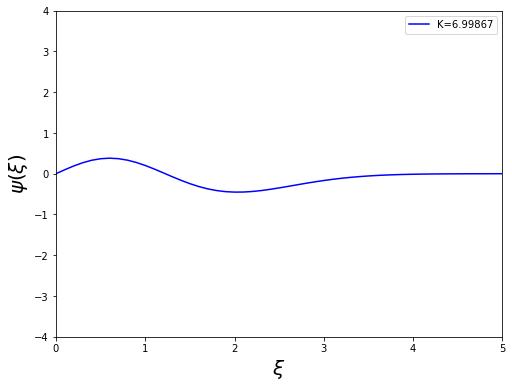

In [29]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(sol_3.t, sol_3.y[0], "b", linestyle = '-', label ="K="+str(round(k,5)))

plt.xlabel(r'$\xi$', size= 20)
plt.ylabel(r'$\psi(\xi)$', size= 20)

plt.xlim(0,5)
plt.ylim(-4,4)

plt.legend()
plt.show()

Then, the third state energy will be 

In [30]:
E3 = (k_3*h*w)/2

display(E3)

3.499335*\omega*hbar

### (d) 

Make a few illustrative panels showing plots of the wave functions for different values of $K$ as they converge to their respective solutions.


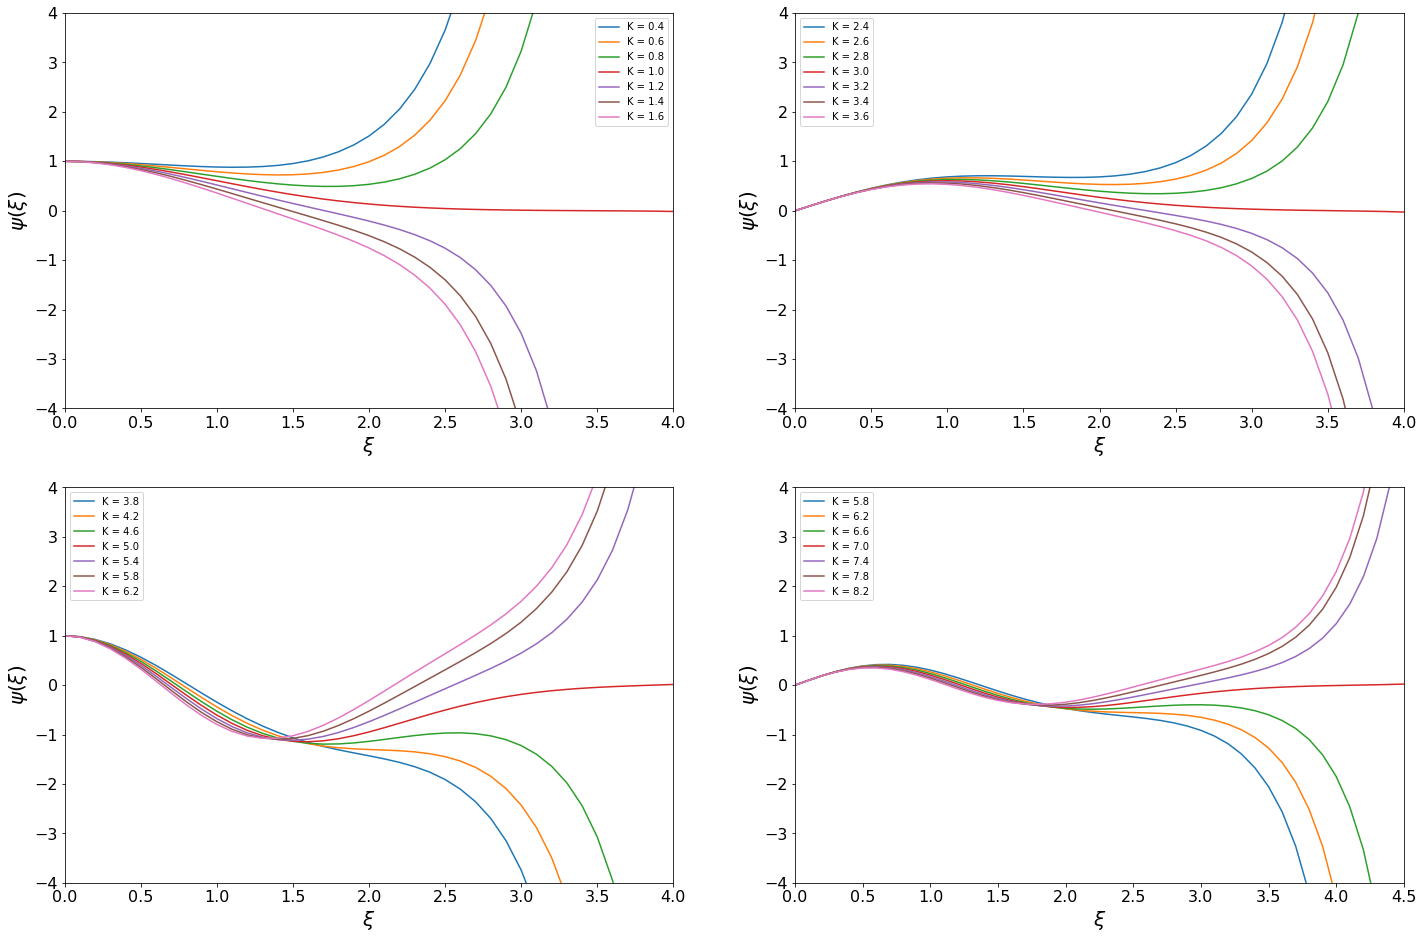

In [39]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24,16))


ks_0 = np.arange(0.4,1.6+0.1,0.2) #an array of different k's

for k in ks_0:
    
    sol = solve_ivp(func, [xi_00, xi_ff], [psi_00_even, d_psi_00_even], method='RK45', t_eval = xi_axis)
    
    ax1.plot(sol.t, sol.y[0])
    
ax1.set_xlabel(r'$\xi$', size= 20)
ax1.set_xlim(0,4)
ax1.set_ylim(-4,4)
ax1.set_ylabel(r'$\psi(\xi)$', size= 20)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax1.legend([f'K = {round(k, 3)}' for k in ks_0], loc=0)


ks_2 = np.arange(3.8,6.2,0.4) #an array of different k's

for k in ks_2:
    
    sol = solve_ivp(func, [xi_00, xi_ff], [psi_00_even, d_psi_00_even], method='RK45', t_eval = xi_axis)
    
    ax3.plot(sol.t, sol.y[0])
    
ax3.set_xlabel(r'$\xi$', size= 20)
ax3.set_xlim(0,4)
ax3.set_ylim(-4,4)
ax3.set_ylabel(r'$\psi(\xi)$', size= 20)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax3.legend([f'K = {round(k, 3)}' for k in ks_2], loc=0)

ks_1 = np.arange(2.4,3.6+0.1,0.2) #an array of different k's

for k in ks_1:
    
    sol = solve_ivp(func, [xi_00, xi_ff], [psi_00_odd, d_psi_00_odd], method='RK45', t_eval = xi_axis)
    
    ax2.plot(sol.t, sol.y[0])
    
ax2.set_xlabel(r'$\xi$', size= 20)
ax2.set_xlim(0,4)
ax2.set_ylim(-4,4)
ax2.set_ylabel(r'$\psi(\xi)$', size= 20)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax2.legend([f'K = {round(k, 3)}' for k in ks_1], loc=0)


ks_3 = np.arange(5.8,8.2+0.1,0.4) #an array of different k's

for k in ks_3:
    
    sol = solve_ivp(func, [xi_00, xi_ff], [psi_00_odd, d_psi_00_odd], method='RK45', t_eval = xi_axis)
    
    ax4.plot(sol.t, sol.y[0])
    
ax4.set_xlabel(r'$\xi$', size= 20)
ax4.set_xlim(0,4.5)
ax4.set_ylim(-4,4)
ax4.set_ylabel(r'$\psi(\xi)$', size= 20)
ax4.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax4.legend([f'K = {round(k, 3)}' for k in ks_3], loc=0)

plt.show()

(e) Make a single plot showing the **harmonic potential** joinly with the **energy ladder** of the quantum harmonic oscillator (include the ground state plus the first three excited states that you calculated above, each with their **respective wave functions**). Consider the particle to be an electron and choose appropriate units for any physical parameters you may need.

In [32]:
# Define the harmonic potential 
def V(x):
    return 1/2*(m)*(w**2)*(x**2)

In [33]:
# m = 9.109*10**(-31)
m=1
w=1
y = []
for i in range(len(xi_axis)):
    y.append(V(xi_axis[i]))

In [35]:
E_0 = np.ones(len(xi_axis))*k_0

E_1 = np.ones(len(xi_axis))*k_1

E_2 = np.ones(len(xi_axis))*k_2

E_3 = np.ones(len(xi_axis))*k_3


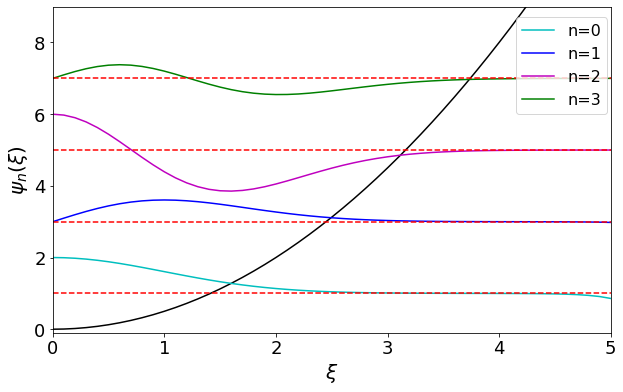

In [36]:
# For plotting
plt.figure(figsize=(10,6))


plt.plot(xi_axis, y, c='k', ls='-')



plt.plot(sol_0.t, sol_0.y[0] + E_0, "c", linestyle = '-', label ="n=0")
plt.plot(xi_axis, E_0, c='r', ls='--')


plt.plot(sol_1.t, sol_1.y[0] + E_1, "b", linestyle = '-', label ="n=1")
plt.plot(xi_axis, E_1, c='r', ls='--')


plt.plot(sol_2.t, sol_2.y[0] + E_2, "m", linestyle = '-', label ="n=2")
plt.plot(xi_axis, E_2, c='r', ls='--')


plt.plot(sol_3.t, sol_3.y[0] + E_3, "g", linestyle = '-', label ="n=3")
plt.plot(xi_axis, E_3, c='r', ls='--')


plt.xlabel(r'$\xi$', size= 20)
plt.ylabel(r'$\psi_n(\xi)$', size= 20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
        

plt.ylim(-0.1,9)
plt.xlim(0,5.)
plt.legend(fontsize=16, loc = (0.83,0.67))
plt.show()

###### 

## Problem 2 (10 points): Thermodynamics and Heat Conduction

Use appropriate numerical algorithms to study how the temperature profile in a heated metal wire evolves in time, under different initial and boundary conditions. For this, you need to solve the 1D heat equation:

$$\frac{\partial T}{\partial t}=\alpha\frac{\partial^2 T}{\partial x^2}$$

where $T=T(x, t)$ describes the temperature of the metal, $x$ is position, $t$ is time, and $\alpha$ is the thermal diffusivity of the metal. We will consider two metals as I explain below.

Assume that the metal wire has a length of $20\,\rm cm$, and choose the wire midpoint as the origin for the problem.

The initial temperature profile in degrees Celsius is given by the following function:

$$T(x, 0)= 175 - 50\cos\left(\frac{\pi x}{5}\right) - x^2$$

where $x$ is in units of $\rm cm$. 

(a) Imagine we keep the temperatures at the edges of the metal wire fixed at a temperature of $25\,\rm C$. Construct a Crank-Nicolson algorithm to simulate the evolution of the temperature profile and find the time in seconds at which thermal equilibrium is reached in two metal wires (one made of Copper with $\alpha=111\,\rm \frac{mm^2}{s}$ and one made of Molybdenum with $\alpha=54.3\,\rm \frac{mm^2}{s}$ ).

In [3]:
# Steps:

h = 0.05 # for space
k = 1 # for time

# Time and Space Vectors
x = np.arange(-10 , 10 + h, h)

t = np.arange(0, 400 + k, k)

# Boundary conditions

bcs = [25, 25] # Fix temperatures at the edges (T=25)

# Initial conditions

ics = 175 - 50*np.cos(np.pi*x/5) - x**2

In [4]:
# Matrix for temperatures

n = len(x)
m = len(t)

T1 = np.zeros((n,m)) #Copper
T2 = np.zeros((n,m)) #Molybdenum

# Add the ics

T1[:, 0] = ics
T2[:, 0] = ics

# Add the bc

T1[0, :] = bcs[0]
T1[-1, :] = bcs[1]

T2[0, :] = bcs[0]
T2[-1, :] = bcs[1]

# The values for the thermal diffusivity constant are in mm^2/s
# We are going to convert those values to cm^2/s by dividing by 100

alphacu = 1.11
alphamb = 0.543

r_factor1 = alphacu * k / h**2

r_factor2 = alphamb * k / h**2

### Copper   $\alpha=111\,\rm \frac{mm^2}{s}$

In [5]:
# First matrix

D1_matrix_0 = np.diag([2 + 2*r_factor1]*(n - 2), 0)

D1_matrix_n = np.diag([-r_factor1]*(n - 3), -1)

D1_matrix_p = np.diag([-r_factor1]*(n - 3), +1)

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

# Second matrix

D2_matrix_0 = np.diag([2 - 2*r_factor1]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor1]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor1]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

In [6]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T1[1:-1, j].copy()

    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor1*(T1[0, j+1] + T1[0, j])
    b[-1] = b[-1] + r_factor1*(T1[-1, j+1] + T1[-1, j])
    
    
    # Compute the soution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    
    # Update T matrix
    T1[1:-1, j+1] = sln_b
    
    # Since we want to get thermal equilibrium we stablish a threshold 
    # for the slope between the first value and the maximum value of 
    # temperature profile
    # We stablish a treshold of m = 0.01  
    
    if ((T1[m//2,j]-T1[1,j])/(m//2-1))<0.01:
        break

nmax1 = j 

print("The temperature profile reaches equilibrium at t="+str(k*j)+' seconds')
    
    

The temperature profile reaches equilibrium at t=163 seconds


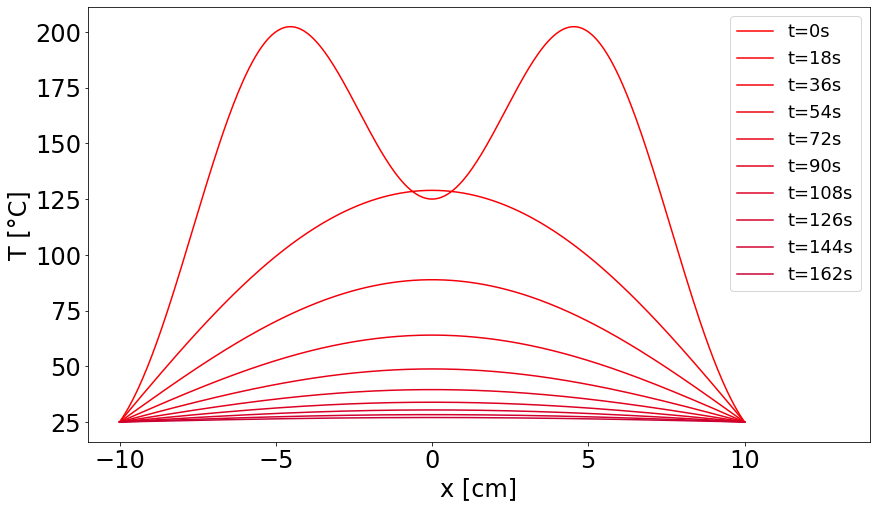

In [7]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(14,8))

for j in range(0, (nmax1)//2 + 1, 9):
    plt.plot(x, T1[:, 2*j] , color = [R[j], G, B[j]], label="t="+str(2*j)+"s")


plt.xlim(-11,14)

plt.xlabel('x [cm]', size= 24)
plt.ylabel('T [°C]', size=24)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 24)
        
plt.legend(fontsize=18)
plt.show()

### Molybdenum   $\alpha=54.3\,\rm \frac{mm^2}{s}$

In [8]:
#First matrix

D1_matrix_0 = np.diag([2 + 2*r_factor2]*(n - 2), 0)

D1_matrix_n = np.diag([-r_factor2]*(n - 3), -1)

D1_matrix_p = np.diag([-r_factor2]*(n - 3), +1)

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

#Second matrix

D2_matrix_0 = np.diag([2 - 2*r_factor2]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor2]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor2]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

In [9]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T2[1:-1, j].copy()
    #print(b.shape)
    #print(b)
    
    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor2*(T2[0, j+1] + T2[0, j])
    b[-1] = b[-1] + r_factor2*(T2[-1, j+1] + T2[-1, j])
    
    # Compute the soution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    # Update T matrix
    T2[1:-1, j+1] = sln_b
    
    # Since we want to get thermal equilibrium we stablish a threshold 
    # for the slope between the first value and the maximum value of 
    # temperature profile
    # We stablish a treshold of m = 0.01  
    
    if ((T2[m//2,j]-T2[1,j])/(m//2-1))<0.01:
        break

nmax2 = j 

print("The temperature profile reaches equilibrium at t="+str(k*j)+' seconds')

The temperature profile reaches equilibrium at t=332 seconds


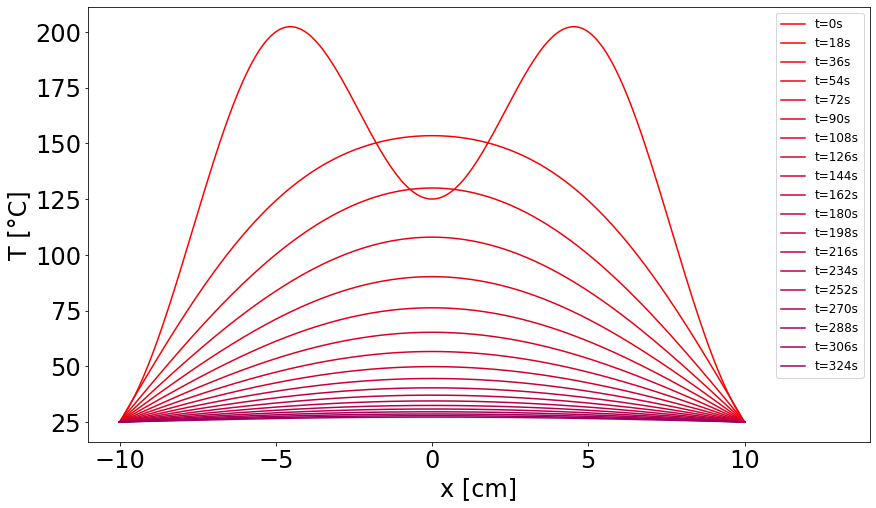

In [10]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(14,8))

for j in range(0, (nmax2)//2 + 1, 9):
    plt.plot(x, T2[:, 2*j] , color = [R[j], G, B[j]], label="t="+str(2*j)+"s")
    
plt.xlim(-11,14)

plt.xlabel('x [cm]', size= 24)
plt.ylabel('T [°C]', size=24)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 24)
        
plt.legend(fontsize=12)
plt.show()

(b) Can we use explicit or FFT methods to solve the problem described in literal (a)? Explain.


First of all, the FFT method is a method that relies on the requierements that the boundary conditions are not fixed and the function of it must be periodic. In this case it is easy to see that our heat equation problem has fixed boundary conditions which makes it a bad candidate to apply the FFT method to solve it.

On the other hand, we can indeed use the explicit method. In the following lines we will apply the explicit method on our problem to get the temperature profile. 

In [11]:
# Steps:

h = 0.05 # for space
k = 1 # for time

# Time and Space Vectors
x = np.arange(-10 , 10 + h, h)

t = np.arange(0, 400 + k, k)

# Boundary conditions

bcs = [25, 25] # Fix temperatures at the edges (T=25)

# Initial conditions

ics = 175 - 50*np.cos(np.pi*x/5) - x**2

In [12]:
# Matrix for temperatures

n = len(x)
m = len(t)

T1 = np.ones((n,m))*25 #Copper
T2 = np.ones((n,m))*25 #Molybdenum

# Add the ics

T1[:, 0] = ics
T2[:, 0] = ics

# Add the bc

T1[0, :] = bcs[0]
T1[-1, :] = bcs[1]

T2[0, :] = bcs[0]
T2[-1, :] = bcs[1]

# The values for the thermal diffusivity constant are in mm^2/s
# We are going to convert those values to cm^2/s by dividing by 100

alphacu = 1.11
alphamb = 0.543

r_factor1 = alphacu * k / h**2

r_factor2 = alphamb * k / h**2

### Copper   $\alpha=111\,\rm \frac{mm^2}{s}$

In [13]:
# Here we apply the explicit method by doing two for loops
# over time and space

# outler loop (time loop)
for j in range(1, m):
    # inner loop (spatial loop)
    for i in range(1, n - 1):
        T1[i, j] = (1 - 2*r_factor1)*T1[i, j-1] + r_factor1*(T1[i-1, j-1] + T1[i+1, j-1])

/home/iandrew/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/home/iandrew/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


### Molybdenum   $\alpha=54.3\,\rm \frac{mm^2}{s}$

In [14]:
# Here we apply the explicit method by doing two for loops
# over time and space

# outler loop (time loop)
for j in range(1, m):
    # inner loop (spatial loop)
    for i in range(1, n - 1):
        T2[i, j] = (1 - 2*r_factor2)*T2[i, j-1] + r_factor2*(T2[i-1, j-1] + T2[i+1, j-1])

/home/iandrew/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/home/iandrew/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


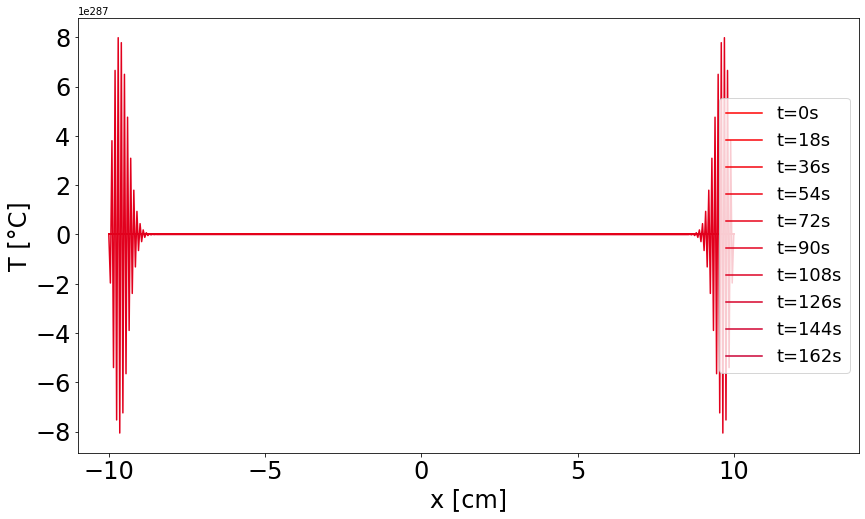

In [15]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(14,8))

for j in range(0, (nmax1+1)//2, 9):
    plt.plot(x, T1[:, 2*j] , color = [R[j], G, B[j]], label="t="+str(2*j)+"s")


plt.xlim(-11,14)

plt.xlabel('x [cm]', size= 24)
plt.ylabel('T [°C]', size=24)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 24)
        
plt.legend(fontsize=18)
plt.show()


332


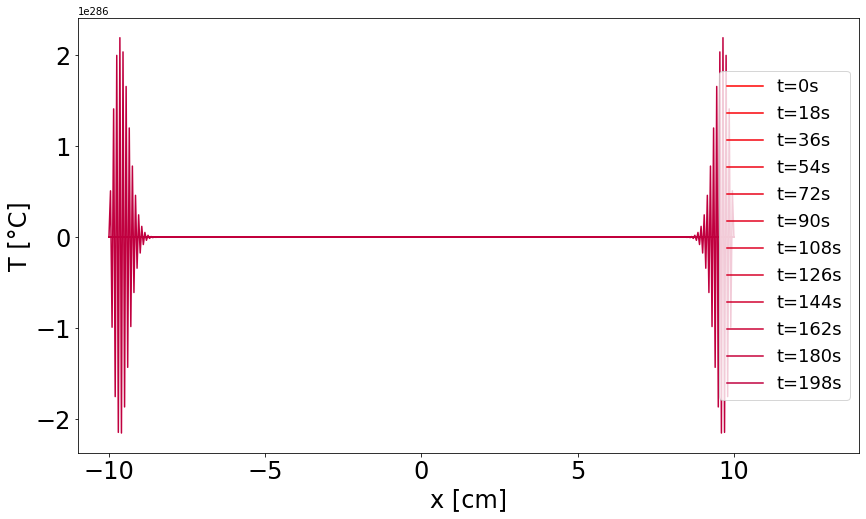

In [16]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(14,8))

print(nmax2)

for j in range(0, 100, 9):
    plt.plot(x, T2[:, j] , color = [R[j], G, B[j]], label="t="+str(2*j)+"s")


plt.xlim(-11,14)

plt.xlabel('x [cm]', size= 24)
plt.ylabel('T [°C]', size=24)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 24)
        
plt.legend(fontsize=18)
plt.show()


It is possible to see that using the explicit method leads on an instable solution that blows up to positive/negative infinity. There is a stability criteria that need to be found in order to use the explicit method sucessfully. For the moment we can see that the method is not stable for the parameters of our problem.

(c) Make a labeled animation showing six panels (with 2 columns and three rows): the top two panels should show the time evolution of the 1D temperature profile of each metal wire, the medium two panels how the temperature surface is built up in time, and the bottom two panels the surface projection onto the $x$-$t$ plane.


KeyboardInterrupt: 

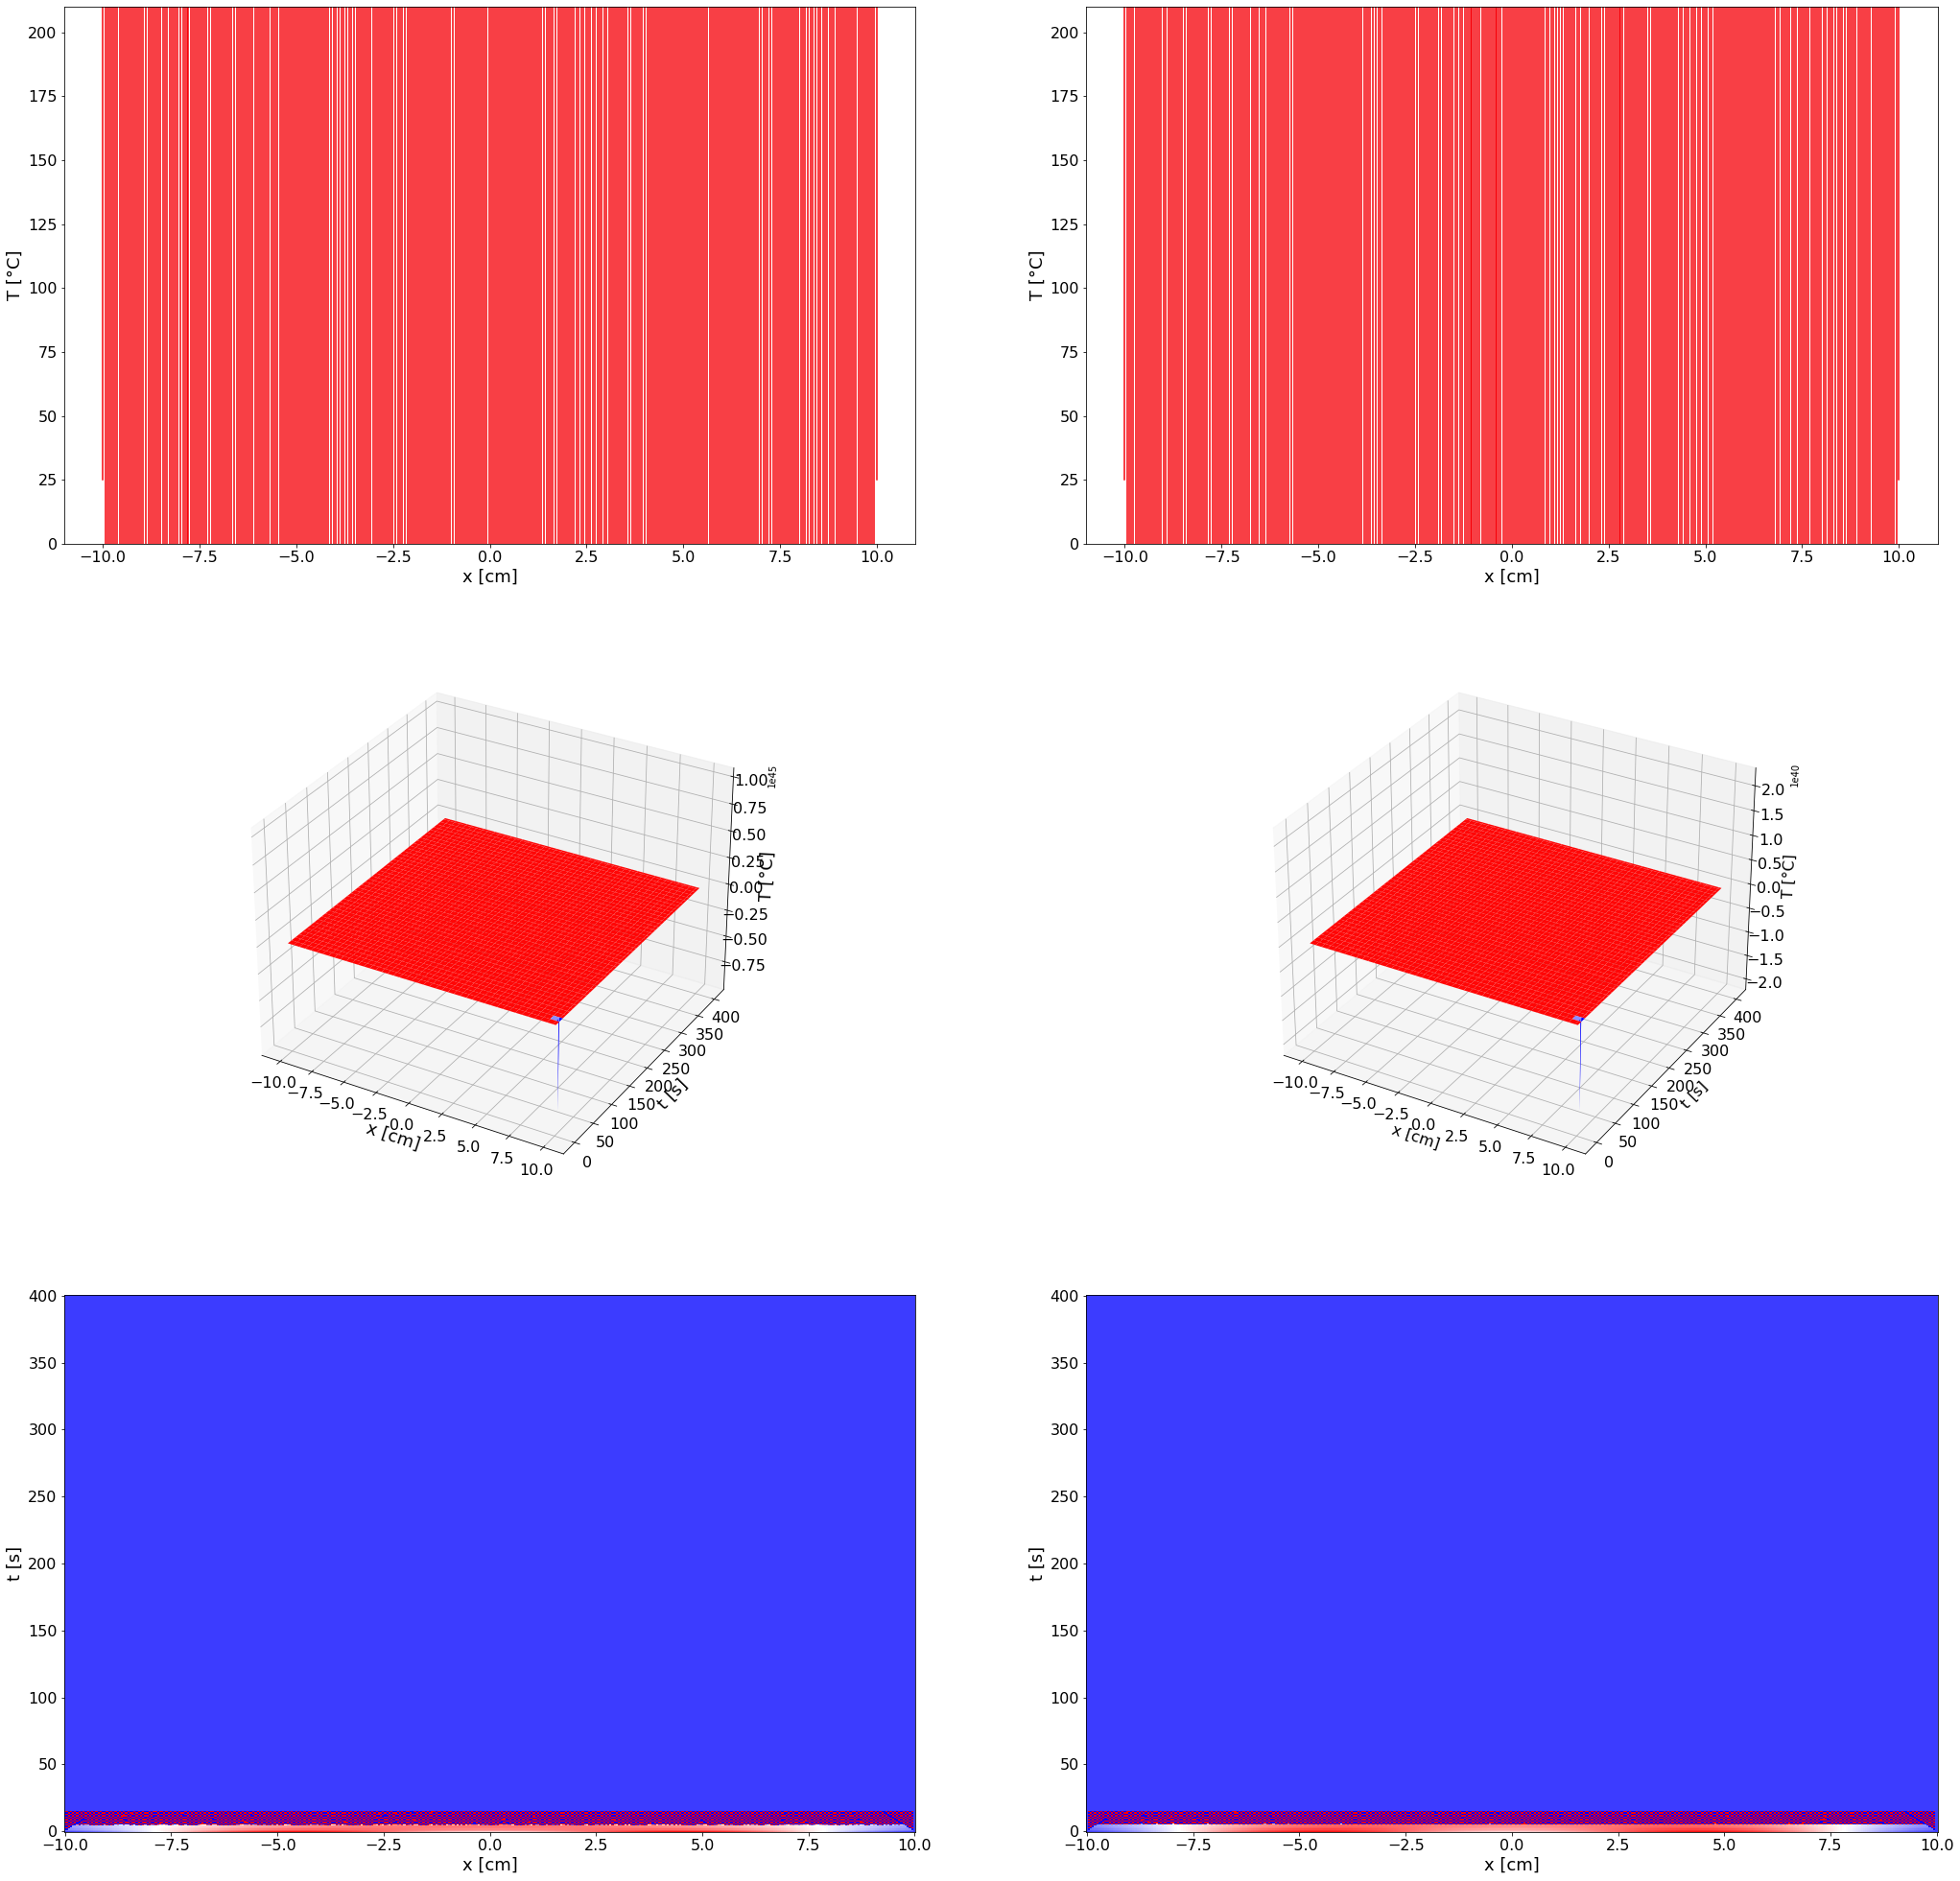

In [17]:
x_grid, t_grid = np.meshgrid(x, t)

# Colors
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0
    
Twhite1 = np.ones((n,m))*25
Twhite2 = np.ones((n,m))*25
    
for j in range(0,  260, 4):
    
    fig, axs = plt.subplots(3, 2, figsize=(30,30))
    
    if nmax1>2*j:
        it=j
    elif nmax1<2*j:
        it=nmax1//2
    
    axs[0, 0].plot(x, T1[:, 2*it -1] , color = [R[j], G, B[j]])
    
    axs[0, 0].set_xlabel('x [cm]', size = 18)
    axs[0, 0].set_ylabel('T [°C]', size = 18)
    axs[0, 0].tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    if nmax2>2*j:
        it=j
    elif nmax2<2*j:
        it=nmax2//2

    axs[0, 1].plot(x, T2[:, 2*it -1] , color = [R[j], G, B[j]])
    
    axs[0, 1].set_xlabel('x [cm]', size = 18)
    axs[0, 1].set_ylabel('T [°C]', size = 18)
    axs[0, 1].tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    axs[0, 0].set_ylim([0, 210])
    axs[0, 1].set_ylim([0, 210])
    
    Twhite1[:,j:j+4]=T1[:,j:j+4]
    
    fig.set_figheight(35)
    fig.set_figwidth(35)
    # Mid-left panel: 3D plot
    ax = plt.subplot(323, projection='3d')
    ax.plot_surface(x_grid, t_grid, Twhite1.T, cmap='bwr')
    ax.set_xlabel('x [cm]', size = 18)  # Customised labels for axes
    ax.set_ylabel('t [s]', size = 18)
    ax.set_zlabel('T [°C]', size = 18)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

    
    Twhite2[:,j:j+4]=T2[:,j:j+4]  
    # Mid-right panel: 3D plot
    ax = plt.subplot(324, projection='3d')
    ax.plot_surface(x_grid, t_grid, Twhite2.T, cmap='bwr')
    ax.set_xlabel('x [cm]', size = 16)  # Customised labels for axes
    ax.set_ylabel('t [s]', size = 16)
    ax.set_zlabel('T [°C]', size = 16)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

    
    axs[2, 0].pcolor(x_grid, t_grid, Twhite1.T, cmap = 'bwr', vmin=0, vmax=210)

    axs[2, 0].set_xlabel('x [cm]', size = 18)
    axs[2, 0].set_ylabel('t [s]', size = 18)
    axs[2, 0].tick_params(axis = 'both', which = 'major', labelsize = 16)  

  
    
    axs[2, 1].pcolor(x_grid, t_grid, Twhite2.T, cmap = 'bwr', vmin=0, vmax=210)
    axs[2, 1].set_xlabel('x [cm]', size = 18)
    axs[2, 1].set_ylabel('t [s]', size = 18)
    axs[2, 1].tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    plt.savefig("./wave1D{:03d}.png".format(j))
    
    plt.close()

In [18]:
images_in = "./wave****.png"

gif_image_out = "./animation_wave.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))

img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)

KeyboardInterrupt: 

(d) Re-study heat diffusion only in the Copper wire, but this time add some noise $f(x)$ with amplitude $\beta$ to the initial condition:

$$T(x, 0)= 175 - 50\cos\left(\frac{\pi x}{5}\right) - x^2 + \beta\,f(x)\,g(x)$$

Note that you need to find an appropriate apodization function $g(x)$ so that the initial boundary conditions remain fixed at $25\,\rm C$. Similarly, you should choice an amplitude for the noise function to be less than a thousandth of the peak temperature value. Does adding the noise change the time at which thermal equilibrium is reached or not? Why yes or why not?



In [19]:
# Steps:

h = 0.05 # for space
k = 1 # for time

# Time and Space Vectors
x = np.arange(-10 + h, 10 + h, h)

t = np.arange(0, 400 + k, k)

# Matrix for temperatures

n = len(x)
m = len(t)

T1 = np.zeros((n,m)) #Copper

# Boundary conditions

bcs = [25, 25] # Fix temperatures at the edges (T=25)

In [20]:
# New initial conditions

ics = 175 - 50*np.cos(np.pi*x/5) - x**2 

# Adding noise with an amplitude of 0.2(Thousand of the peak temperature)

noise = [random.uniform(-2, 2) for i in range(len(ics))]

# We are using the Hanning apodization function to mantain the edges at 25degrees

hann_window = np.hanning(len(ics))

ics = ics + hann_window*noise

# Add the ics

T1[:, 0] = ics

# Add the bc

T1[0, :] = bcs[0]
T1[-1, :] = bcs[1]

# The values for the thermal diffusivity constant are in mm^2/s
# We are going to convert those values to cm^2/s by dividing by 100

alphacu = 1.11

r_factor1 = alphacu * k / h**2

In [21]:
# First matrix

D1_matrix_0 = np.diag([2 + 2*r_factor1]*(n - 2), 0)

D1_matrix_n = np.diag([-r_factor1]*(n - 3), -1)

D1_matrix_p = np.diag([-r_factor1]*(n - 3), +1)

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

# Second matrix

D2_matrix_0 = np.diag([2 - 2*r_factor1]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor1]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor1]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

In [22]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T1[1:-1, j].copy()

    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor1*(T1[0, j+1] + T1[0, j])
    b[-1] = b[-1] + r_factor1*(T1[-1, j+1] + T1[-1, j])
    
    
    # Compute the soution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    # Update T matrix
    T1[1:-1, j+1] = sln_b

    # Since we want to get thermal equilibrium we stablish a threshold 
    # for the slope between the first value and the maximum value of 
    # temperature profile
    # We stablish a treshold of m = 0.01  
    
    if ((T1[m//2,j]-T1[1,j])/(m//2-1))<0.01:
        break

nmax3 = j 

print("The temperature profile reaches equilibrium at t="+str(k*j)+' seconds')

The temperature profile reaches equilibrium at t=152 seconds


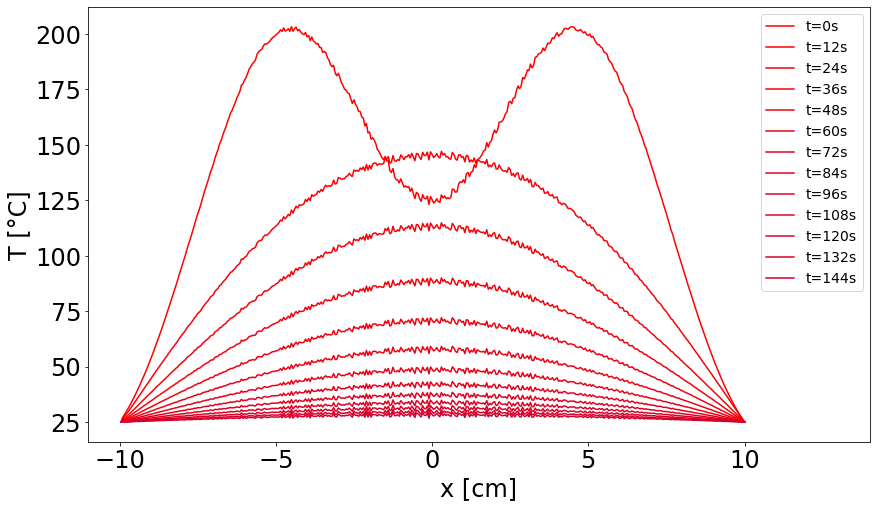

In [23]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(14,8))

for j in range(0, (nmax3)//2 + 1, 6):
    plt.plot(x, T1[:, 2*j] , color = [R[j], G, B[j]], label="t="+str(2*j)+"s")
    
plt.xlim(-11,14)

plt.xlabel('x [cm]', size = 24)
plt.ylabel('T [°C]', size = 24)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 24)
        
plt.legend(fontsize=14)
plt.show()

#### Does adding the noise change the time at which thermal equilibrium is reached or not? Why yes or why not?

Yes it changes it. The time when the thermal equilibrium is reached is reduced. 

For the copper wire, in part a) where any noise is applied the equilibrium is reached at t= 163 seconds. On the other hand, if we add noise with an amplitude of 2.0 units we reach thermal equilibrium at t=152 seconds. 

The time is changed because of the instabilities that the temperature profile shows on every time step i.e. the small peaks of values. In other words, we can get get a slope slightly above or slightly below from our real values. 

(e) Re-study heat diffusion only in the Copper wire for the original $T(x, 0)$, but this time assume that the boundaries cannot be kept constant (because of e.g. a faulty cooling system). Instead they also evolve in time according to the following functions:

$T(-10\,{\rm cm}, t) = 25 + t$

$T(+10\,{\rm cm}, t) = 25 + 0.5\,t$

where $T(x, t)$ is in degrees Celsius, and $t$ in seconds. Run the simulation until the temperature profile shows a linear trend.

In [24]:
# Steps:

h = 0.05 # for space
k = 1 # for time

# Time and Space Vectors
x = np.arange(-10 + h, 10 + h, h)

t = np.arange(0, 85 + k, k)

# Matrix for temperatures

n = len(x)
m = len(t)

T1 = np.zeros((n,m)) #Copper


In [25]:
# Initial conditions

ics = 175 - 50*np.cos(np.pi*x/5) - x**2

# Add the ics

T1[:, 0] = ics


# Adding the bcs to each column of the Temperature profile following the given equation:

for i in range(m):
    T1[0, i] = 25 + t[i]
    
    T1[-1, i] = 25 + 0.5*t[i]
    

# The values for the thermal diffusivity constant are in mm^2/s
# We are going to convert those values to cm^2/s by dividing by 100

alphacu = 1.11

r_factor1 = alphacu * k / h**2

In [26]:
# First matrix

D1_matrix_0 = np.diag([2 + 2*r_factor1]*(n - 2), 0)

D1_matrix_n = np.diag([-r_factor1]*(n - 3), -1)

D1_matrix_p = np.diag([-r_factor1]*(n - 3), +1)

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

# Second matrix

D2_matrix_0 = np.diag([2 - 2*r_factor1]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor1]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor1]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

In [27]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T1[1:-1, j].copy()

    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor1*(T1[0, j+1] + T1[0, j])
    b[-1] = b[-1] + r_factor1*(T1[-1, j+1] + T1[-1, j])
    
    # Compute the soution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    # Update T matrix
    T1[1:-1, j+1] = sln_b



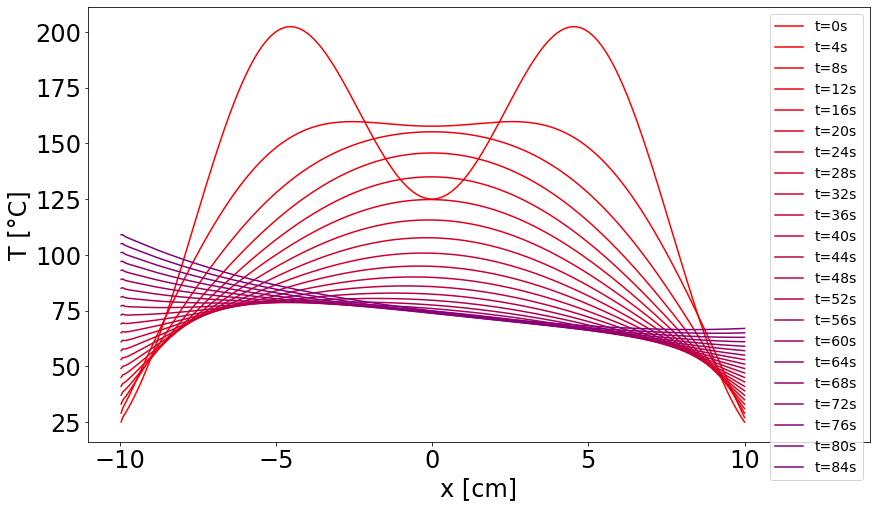

In [28]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(14,8))

for j in range(0, (m+1)//2, 2):
    plt.plot(x, T1[:, 2*j] , color = [R[j], G, B[j]], label="t="+str(2*j)+"s")
    
plt.xlim(-11,14)

plt.xlabel('x [cm]', size = 24)
plt.ylabel('T [°C]', size = 24)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 24)
        
plt.legend(fontsize=14)
plt.show()


In [78]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0


for j in range((m+1)//2):
    
    plt.figure(figsize=(10,6))
    
    plt.plot(x, T1[:, 2*j] , color = [R[j], G, B[j]])
    
    plt.ylim(0,210)
    
    plt.savefig("./Tempco{:03d}.png".format(j))
    
    plt.close()

#plt.legend([f't={2*t_value.round(3)}' for t_value in t])

In [79]:
images_in = "./Tempco***.png"

gif_image_out = "./animation_tempcu.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))

img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)

